<a href="https://colab.research.google.com/github/kamakshisoni/Internship-task/blob/main/taskdata2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Please find some metadata around each columns.
- max_return_days: Maximum number of days in which user made a re-purchase

- average_return_days: Average number of days in which user made a purchase

- customer_since_months : No of months since user started paying

- total_revenue: Total revenue made from this user

- average_revenue: Average revenue made from this user

- avg_vas_count: Average amount of vas counts

- avg_used_vas_value: Average number of vas used by the user

- business_type: Business type

- avg_wallet_bonus: Average bonus amount in wallet

- avg_active_ads: Average no of active ads

- avg_new_ads: Average no of new ads

- avg_email_replies: Average no of email replies

- avg_call_replies: Average no of call replies

- avg_sms_replies: Average no of sms replies

- target: If user stays or leaves



#### Basic Insights from the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving my file.csv to my file.csv


In [ ]:
import io

df = pd.read_csv(io.BytesIO(uploaded['my file.csv']))

In [ ]:
df.head(10)

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.0,0.0,3.666667,66.666667,0,300.00,79.333333,15.250000,32.416667,27.916667,0.250000,0
1,410240,499.0,37,8.200000,10,0.0,0.0,4.900000,114.000000,0,0.00,232.100000,18.300000,16.200000,13.800000,0.000000,0
2,411764,493.0,9,1.533333,15,0.0,0.0,5.333333,106.666667,0,150.00,55.083333,3.750000,20.250000,24.500000,0.000000,0
3,411985,262.0,1,1.000000,14,0.0,0.0,6.307692,176.153846,0,1481.00,409.538462,80.769231,87.461538,57.615385,0.000000,1
4,412071,496.0,1,1.000000,18,0.0,0.0,5.846154,109.230769,0,41.50,48.230769,1.692308,17.461538,25.769231,0.230769,0
5,412391,113.0,1,1.000000,14,0.0,0.0,12.692308,380.769231,0,350.00,799.153846,115.153846,166.307692,160.769231,0.153846,0
6,412662,1005.0,21,4.636364,11,0.0,0.0,1.000000,26.363636,0,0.00,119.727273,12.454545,46.000000,57.272727,0.181818,0
7,457000,262.0,29,3.250000,16,0.0,0.0,3.250000,68.750000,3,63.07,26.937500,3.250000,18.625000,17.062500,0.062500,0
8,490356,1005.0,3,1.400000,5,0.0,0.0,0.000000,0.000000,5,0.00,2.500000,0.500000,1.000000,1.750000,0.000000,1
9,491551,1017.0,1,1.000000,2,0.0,0.0,0.000000,0.000000,0,0.00,74.500000,10.500000,4.500000,9.500000,0.000000,1


In [ ]:
df.shape

(4407, 17)

In [ ]:
df.columns

Index(['user_id', 'account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'total_revenue', 'average_revenue',
       'avg_vas_count', 'avg_used_vas_value', 'business_type',
       'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_call_replies', 'avg_sms_replies', 'target'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4407 entries, 0 to 4406
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                4407 non-null   int64  
 1   account_id             4400 non-null   float64
 2   max_return_days        4407 non-null   int64  
 3   average_return_days    4407 non-null   float64
 4   customer_since_months  4407 non-null   int64  
 5   total_revenue          4407 non-null   float64
 6   average_revenue        4407 non-null   float64
 7   avg_vas_count          4407 non-null   float64
 8   avg_used_vas_value     4407 non-null   float64
 9   business_type          4407 non-null   int64  
 10  avg_wallet_bonus       4407 non-null   float64
 11  avg_active_ads         4407 non-null   float64
 12  avg_new_ads            4407 non-null   float64
 13  avg_email_replies      4407 non-null   float64
 14  avg_call_replies       4407 non-null   float64
 15  avg_

In [ ]:
df.describe(include='all')

,user_id,account_id,max_return_days,average_return_days,customer_since_months,total_revenue,average_revenue,avg_vas_count,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_call_replies,avg_sms_replies,target
count,4.407000e+03,4400.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000,4407.000000
mean,4.106655e+09,506.553864,22.335602,7.171576,9.874064,194.130365,16.942615,3.249388,72.119006,0.497844,338.851046,98.922260,16.812003,25.681004,27.622151,0.162009,0.103245
std,6.794948e+09,326.072756,43.591246,19.209092,5.169639,1548.361547,128.268824,5.509869,117.019515,1.199725,831.746150,297.692950,68.045904,55.324218,61.069006,0.517693,0.304313
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184510e+08,226.000000,1.000000,1.000000,5.000000,0.000000,0.000000,0.142857,2.727273,0.000000,0.000000,13.500000,2.500000,4.461538,4.384615,0.000000,0.000000
50%,7.296626e+08,493.000000,2.000000,1.076923,12.000000,0.000000,0.000000,2.000000,45.000000,0.000000,40.000000,40.000000,6.333333,12.266667,12.933333,0.000000,0.000000
75%,7.292936e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,0.000000,4.333333,100.000000,0.000000,327.280000,101.291667,14.250000,28.000000,30.784615,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,43957.172700,3852.727273,156.583333,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,1743.266667,14.636364,1.000000


In [ ]:
pd.DataFrame(list(zip(df.columns,df.isnull().sum(),df.isnull().sum()/4407*100)),columns=['Features','n/a','%'])

,Features,n/a,%
0,user_id,0,0.000000
1,account_id,7,0.158838
2,max_return_days,0,0.000000
3,average_return_days,0,0.000000
4,customer_since_months,0,0.000000
5,total_revenue,0,0.000000
6,average_revenue,0,0.000000
7,avg_vas_count,0,0.000000
8,avg_used_vas_value,0,0.000000
9,business_type,0,0.000000


Since this data has missing values in account id so I will remove 7 entries from account id column later.

In [ ]:
df.dropna(subset=['account_id'],axis=0,inplace=True)

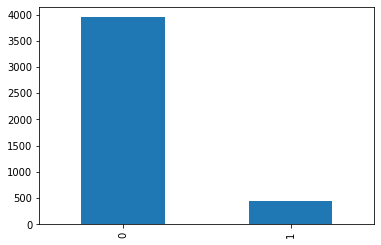

In [ ]:
df.target.value_counts().plot(kind='bar')

In [ ]:
df.columns

Index(['user_id', 'account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'total_revenue', 'average_revenue',
       'avg_vas_count', 'avg_used_vas_value', 'business_type',
       'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_call_replies', 'avg_sms_replies', 'target'],
      dtype='object')

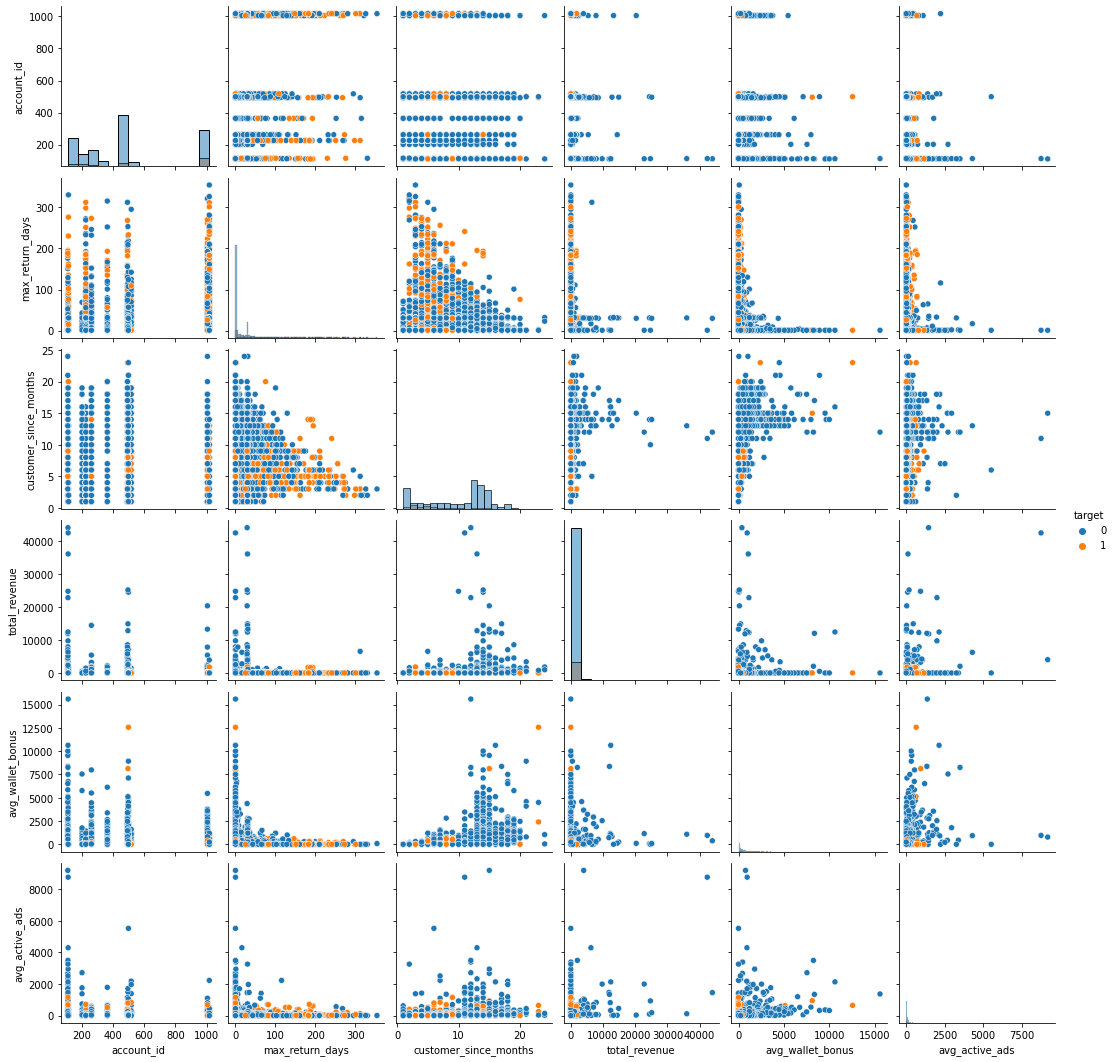

In [ ]:
cont_col= ['account_id', 'max_return_days',
       'customer_since_months', 'total_revenue',
       'avg_wallet_bonus', 'avg_active_ads','target']
sns.pairplot(df[cont_col],  diag_kind = "hist" , hue = 'target' )
plt.show()

customer_since_months    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

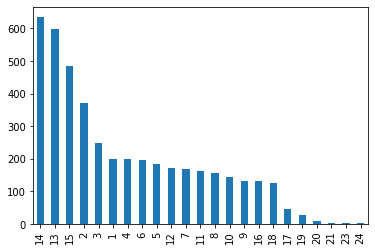

In [ ]:
df[['customer_since_months']].apply(lambda x: x.value_counts().plot(kind='bar'))

business_type    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

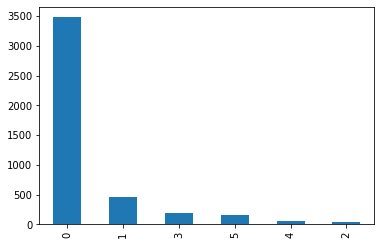

In [ ]:
df[['business_type']].apply(lambda x: x.value_counts().plot(kind='bar'))

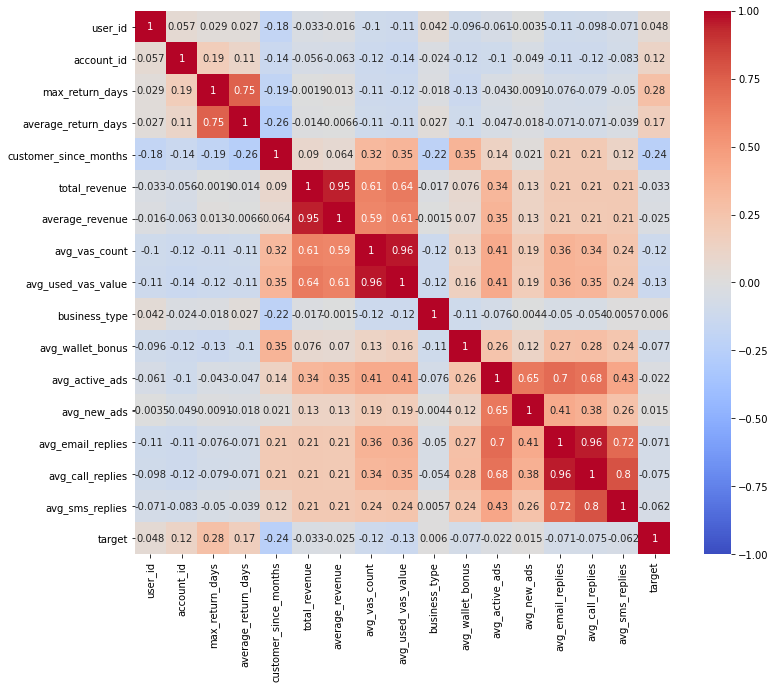

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),vmin=-1,cmap='coolwarm',annot=True)

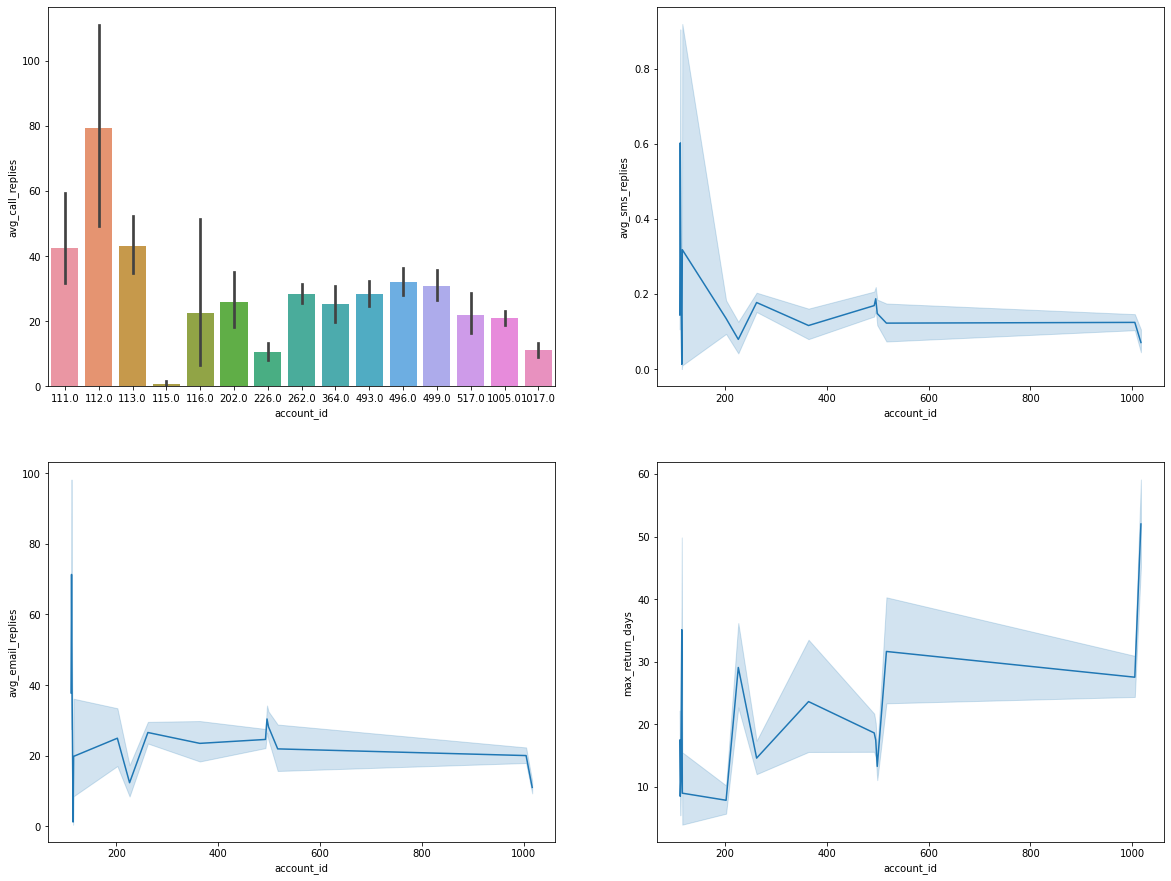

In [ ]:

f,(ax1,ax2,ax3)=plt.subplots(1,3,sharex="col",sharey="row",figsize=(20,4))
plt.subplot(2,2,1)
sns.barplot(x='account_id',y='avg_call_replies',data=df)
#plt.title("Year at present Job vs Job Category")
#plt.xlabel("Defaulter")
#plt.ylabel("Years at present Job")
plt.subplot(2,2,2)
sns.lineplot(x='account_id',y='avg_sms_replies',data=df,markers=True)
#plt.title("Years of Job vs Reason")
#plt.xlabel("Defaulter")
#plt.ylabel("Years at present Job")
plt.subplot(2,2,3)
sns.lineplot(x='account_id',y='avg_email_replies',data=df,markers=True)
#plt.title("Age of oldest trade line vs Job category")
#plt.xlabel("Defaulter")
#plt.ylabel("Age of oldest trade line(months)")
plt.subplot(2,2,4)
sns.lineplot(x='account_id',y='max_return_days',data=df,markers=True)
#plt.title("Age of oldest trade line vs Reason")
#plt.xlabel("Defaulter")
#plt.ylabel("Age of oldest trade line(months)")
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

In [ ]:
group1 = df[['account_id','avg_call_replies','avg_email_replies']]
group1.head()

,account_id,avg_call_replies,avg_email_replies
0,496.0,27.916667,32.416667
1,499.0,13.800000,16.200000
2,493.0,24.500000,20.250000
3,262.0,57.615385,87.461538
4,496.0,25.769231,17.461538


In [ ]:
groupby1 = group1.groupby(['account_id']).sum()
groupby1

,avg_call_replies,avg_email_replies
account_id,,
111.0,10567.074736,9366.079346
112.0,11723.136075,10558.587856
113.0,12470.279677,11396.999421
115.0,55.653283,85.363384
116.0,764.464286,672.380952
202.0,2881.905869,2766.815546
226.0,2871.510914,3386.595344
262.0,12471.078678,11626.277379
364.0,3398.016231,3144.322818


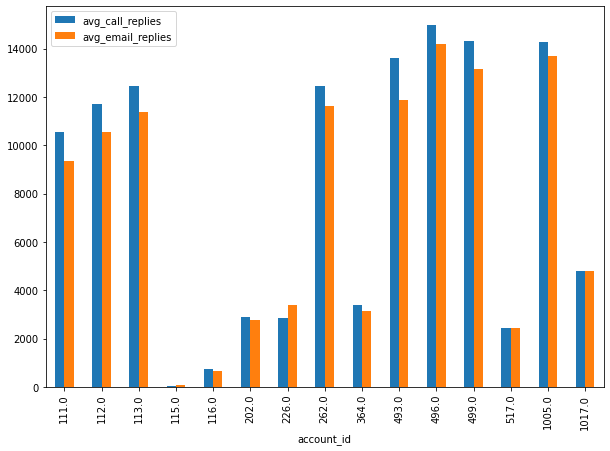

In [ ]:

groupby1.plot(kind='bar',stacked=False,figsize=(10,7))

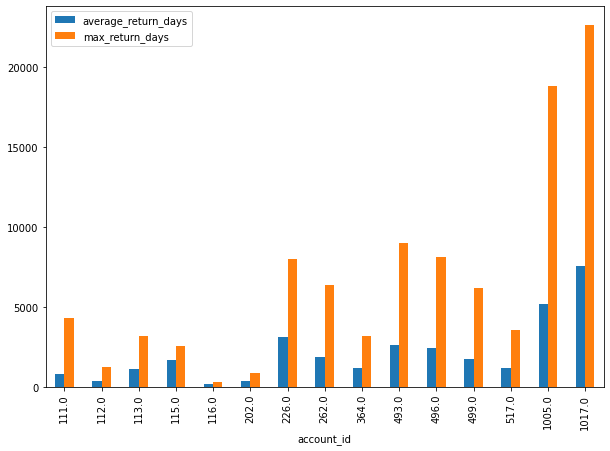

In [ ]:
group2 = df[['account_id','average_return_days','max_return_days']]
groupby2 = group2.groupby(['account_id']).sum()
groupby2.plot(kind='bar',figsize=(10,7))

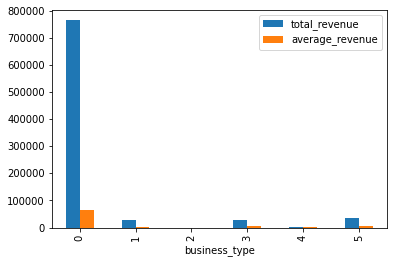

In [ ]:
business = df[['business_type','total_revenue','average_revenue']].groupby(['business_type']).sum()
business.plot(kind='bar')

In [ ]:
from scipy import stats

In [ ]:
#Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:

X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,user_id,1.312378
1,account_id,2.577391
2,max_return_days,3.009064
3,average_return_days,2.655808
4,customer_since_months,3.645890
5,total_revenue,11.252873
6,average_revenue,10.936203
7,avg_vas_count,18.748812
8,avg_used_vas_value,21.241501
9,business_type,1.148537


we need to fix some features as they have VIF>10 that indicates multicollinearity 
- 5	total_revenue	11.252873
- 6	average_revenue	10.936203
- 7	avg_vas_count	18.748812
- 8	avg_used_vas_value	21.241501
- 13	avg_email_replies	15.875513
- 14	avg_call_replies	20.895510

In [ ]:
# between total_revenue and average_revenue: average_revenue is important, so we will remove total_revenue from the dataset
df.drop(['total_revenue'],axis=1,inplace=True)
df.columns

Index(['user_id', 'account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'average_revenue', 'avg_vas_count',
       'avg_used_vas_value', 'business_type', 'avg_wallet_bonus',
       'avg_active_ads', 'avg_new_ads', 'avg_email_replies',
       'avg_call_replies', 'avg_sms_replies', 'target'],
      dtype='object')

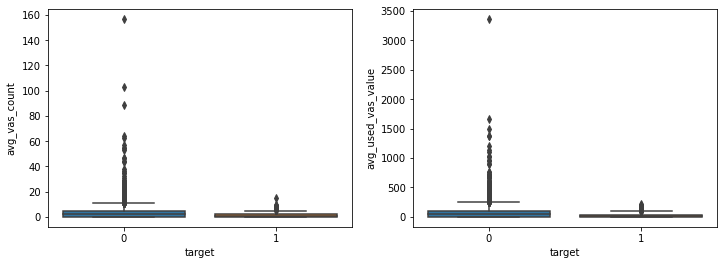

In [ ]:
f,(ax1,ax2)=plt.subplots(1,2,sharex="col",sharey="row",figsize=(12,4))
plt.subplot(1,2,1)
sns.boxplot(x='target',y='avg_vas_count',data= df)
plt.subplot(1,2,2)
sns.boxplot(x='target',y='avg_used_vas_value',data=df)
plt.show()


In [ ]:
df.drop(['avg_vas_count'],axis=1,inplace=True)
df.columns

Index(['user_id', 'account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'average_revenue', 'avg_used_vas_value',
       'business_type', 'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_call_replies', 'avg_sms_replies', 'target'],
      dtype='object')

In [ ]:
# checking VIF
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,user_id,1.308623
1,account_id,2.572678
2,max_return_days,3.006447
3,average_return_days,2.655313
4,customer_since_months,3.623135
5,average_revenue,1.878366
6,avg_used_vas_value,2.890742
7,business_type,1.146115
8,avg_wallet_bonus,1.447838
9,avg_active_ads,3.903558


In [ ]:
df.drop(['avg_call_replies'],axis=1,inplace=True)
df.columns

Index(['user_id', 'account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'average_revenue', 'avg_used_vas_value',
       'business_type', 'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_sms_replies', 'target'],
      dtype='object')

In [ ]:
# checking VIF
X = df.iloc[:,:-1]
calc_vif(X)

,variables,VIF
0,user_id,1.307950
1,account_id,2.571798
2,max_return_days,3.005845
3,average_return_days,2.655204
4,customer_since_months,3.611203
5,average_revenue,1.867243
6,avg_used_vas_value,2.890558
7,business_type,1.144435
8,avg_wallet_bonus,1.447605
9,avg_active_ads,3.771907


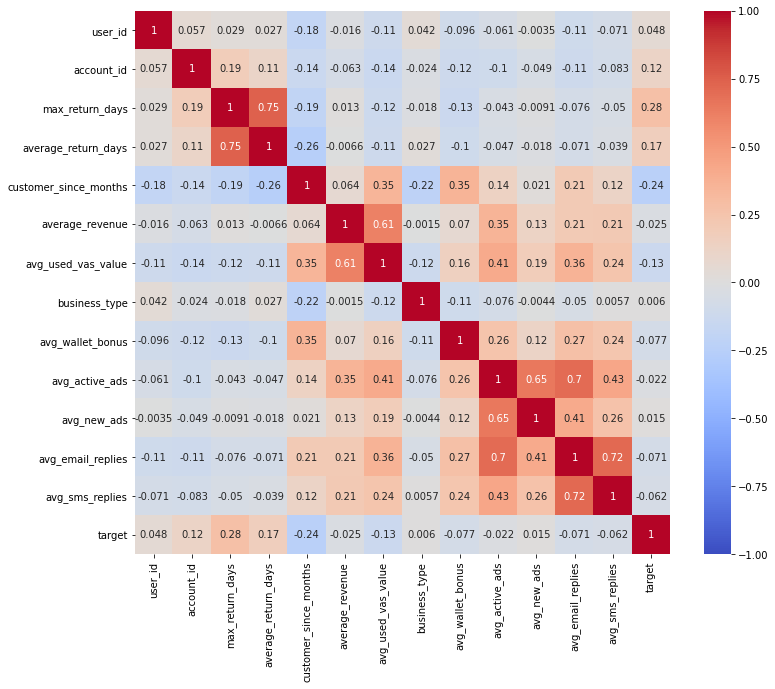

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(),vmin=-1,cmap='coolwarm',annot=True)

In [ ]:
df.business_type.value_counts()

0    3478
1     457
3     199
5     165
4      52
2      49
Name: business_type, dtype: int64

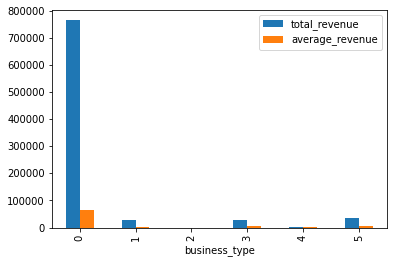

In [ ]:
business.plot(kind='bar')

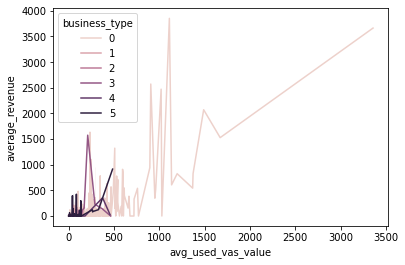

In [ ]:
sns.lineplot(x='avg_used_vas_value', y='average_revenue', hue = 'business_type',data = df,markers=True)

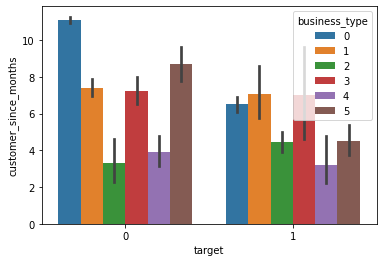

In [ ]:
sns.barplot(x='target',y='customer_since_months',hue='business_type',data=df)

In [ ]:
df.max_return_days.value_counts().to_frame()

,max_return_days
1,2088
31,250
2,202
3,167
4,110
...,...
110,1
154,1
158,1
174,1


In [ ]:
return_day = df[['user_id','max_return_days']]

In [ ]:
return_day.head()

,user_id,max_return_days
0,410039,8
1,410240,37
2,411764,9
3,411985,1
4,412071,1


In [ ]:
Frequency = []
for day in return_day['max_return_days']:
    if day>30:
        day=3
    elif (day<=30)and(day>2):
        day=2
    Frequency.append(day)  


In [ ]:

for n,i in enumerate(Frequency):
    if i==1:
        Frequency[n]="Very Frequent"
    elif i==2:
        Frequency[n]='Moderately Frequent'
    else:
        Frequency[n]='Not Frequent'
Frequency

['Moderately Frequent',
 'Not Frequent',
 'Moderately Frequent',
 'Very Frequent',
 'Very Frequent',
 'Very Frequent',
 'Moderately Frequent',
 'Moderately Frequent',
 'Moderately Frequent',
 'Very Frequent',
 'Moderately Frequent',
 'Not Frequent',
 'Moderately Frequent',
 'Very Frequent',
 'Not Frequent',
 'Very Frequent',
 'Very Frequent',
 'Very Frequent',
 'Very Frequent',
 'Not Frequent',
 'Moderately Frequent',
 'Not Frequent',
 'Very Frequent',
 'Very Frequent',
 'Not Frequent',
 'Very Frequent',
 'Not Frequent',
 'Very Frequent',
 'Moderately Frequent',
 'Very Frequent',
 'Moderately Frequent',
 'Very Frequent',
 'Not Frequent',
 'Not Frequent',
 'Moderately Frequent',
 'Very Frequent',
 'Very Frequent',
 'Not Frequent',
 'Very Frequent',
 'Moderately Frequent',
 'Very Frequent',
 'Very Frequent',
 'Very Frequent',
 'Not Frequent',
 'Very Frequent',
 'Very Frequent',
 'Very Frequent',
 'Moderately Frequent',
 'Moderately Frequent',
 'Very Frequent',
 'Very Frequent',
 'Not Fre

In [ ]:
return_day['re-purchase']=pd.Series(Frequency)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
return_day.head()

,user_id,max_return_days,re-purchase
0,410039,8,Moderately Frequent
1,410240,37,Not Frequent
2,411764,9,Moderately Frequent
3,411985,1,Very Frequent
4,412071,1,Very Frequent


In [ ]:
df_new=pd.concat([df,return_day['re-purchase']],axis=1)
df_new.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,average_revenue,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_sms_replies,target,re-purchase
0,410039,496.0,8,1.500000,14,0.0,66.666667,0,300.0,79.333333,15.250000,32.416667,0.250000,0,Moderately Frequent
1,410240,499.0,37,8.200000,10,0.0,114.000000,0,0.0,232.100000,18.300000,16.200000,0.000000,0,Not Frequent
2,411764,493.0,9,1.533333,15,0.0,106.666667,0,150.0,55.083333,3.750000,20.250000,0.000000,0,Moderately Frequent
3,411985,262.0,1,1.000000,14,0.0,176.153846,0,1481.0,409.538462,80.769231,87.461538,0.000000,1,Very Frequent
4,412071,496.0,1,1.000000,18,0.0,109.230769,0,41.5,48.230769,1.692308,17.461538,0.230769,0,Very Frequent


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


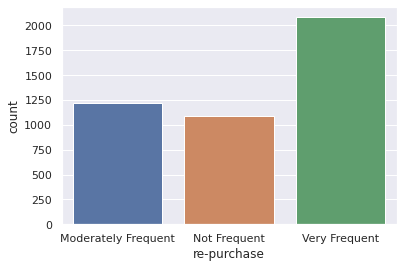

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')
sns.countplot(df_new['re-purchase'])

In [ ]:
df_new.describe()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,average_revenue,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_sms_replies,target
count,4.400000e+03,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000,4400.000000
mean,4.106191e+09,506.553864,22.362500,7.174561,9.884545,16.969570,72.217150,0.496591,339.299218,98.992841,16.768863,25.711065,0.162266,0.103182
std,6.798984e+09,326.072756,43.618703,19.219665,5.163509,128.369056,117.082250,1.198236,832.312947,297.898133,67.975094,55.361244,0.518064,0.304231
min,4.100390e+05,111.000000,1.000000,0.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6.184590e+08,226.000000,1.000000,1.000000,5.000000,0.000000,2.964286,0.000000,0.000000,13.538462,2.500000,4.490385,0.000000,0.000000
50%,7.293982e+08,493.000000,2.000000,1.076923,12.000000,0.000000,45.000000,0.000000,41.500000,40.000000,6.333333,12.307692,0.000000,0.000000
75%,7.292738e+09,1005.000000,30.000000,5.666667,14.000000,0.000000,100.000000,0.000000,328.275000,101.333333,14.250000,28.000000,0.153846,0.000000
max,7.356031e+10,1017.000000,354.000000,354.000000,24.000000,3852.727273,3357.500000,5.000000,15606.500000,9183.866667,2606.000000,1716.400000,14.636364,1.000000


Customer_since_months
- min = 1
- q1 = 5
- q2 = 12
- q3 = 14
- max = 24


In [ ]:
df3=df[['customer_since_months','avg_used_vas_value','avg_active_ads']]

In [ ]:
#df3['customer_since_months_new']
list1=[]
for i in df3['customer_since_months']:
    if i>14:
        i='Consistent Customer'
    elif (i<=14)and(i>12):
        i='Moderately Consistent'
    elif (i<=12)and(i>5):
        i='becoming Consistent'
    else:
        i='New Customer'
    list1.append(i)  
 

In [ ]:
df3['customer_since_months_new']=pd.Series(list1)
df3.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,customer_since_months,avg_used_vas_value,avg_active_ads,customer_since_months_new
0,14,66.666667,79.333333,Moderately Consistent
1,10,114.000000,232.100000,becoming Consistent
2,15,106.666667,55.083333,Consistent Customer
3,14,176.153846,409.538462,Moderately Consistent
4,18,109.230769,48.230769,Consistent Customer


In [ ]:
df_new=pd.concat([df_new,df3['customer_since_months_new']],axis=1)
df_new.head()

,user_id,account_id,max_return_days,average_return_days,customer_since_months,average_revenue,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_sms_replies,target,re-purchase,customer_since_months_new
0,410039,496.0,8,1.500000,14,0.0,66.666667,0,300.0,79.333333,15.250000,32.416667,0.250000,0,Moderately Frequent,Moderately Consistent
1,410240,499.0,37,8.200000,10,0.0,114.000000,0,0.0,232.100000,18.300000,16.200000,0.000000,0,Not Frequent,becoming Consistent
2,411764,493.0,9,1.533333,15,0.0,106.666667,0,150.0,55.083333,3.750000,20.250000,0.000000,0,Moderately Frequent,Consistent Customer
3,411985,262.0,1,1.000000,14,0.0,176.153846,0,1481.0,409.538462,80.769231,87.461538,0.000000,1,Very Frequent,Moderately Consistent
4,412071,496.0,1,1.000000,18,0.0,109.230769,0,41.5,48.230769,1.692308,17.461538,0.230769,0,Very Frequent,Consistent Customer


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


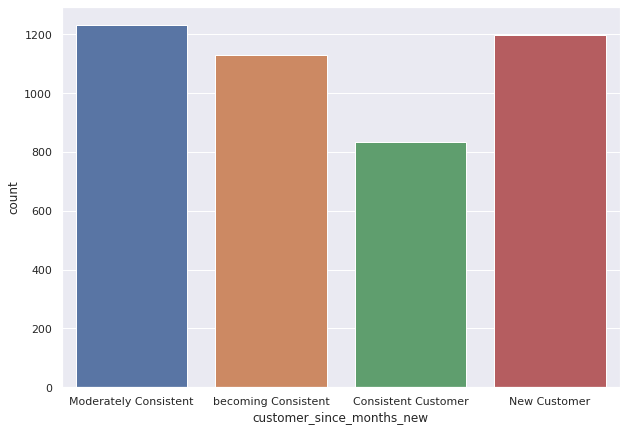

In [ ]:
plt.figure(figsize=(10,7))
sns.set(style='darkgrid')
sns.countplot(df3['customer_since_months_new'])

In [ ]:
df3.head()

,customer_since_months,avg_used_vas_value,avg_active_ads,customer_since_months_new
0,14,66.666667,79.333333,Moderately Consistent
1,10,114.000000,232.100000,becoming Consistent
2,15,106.666667,55.083333,Consistent Customer
3,14,176.153846,409.538462,Moderately Consistent
4,18,109.230769,48.230769,Consistent Customer


### avg_used_vas_value: Average number of vas used by the user

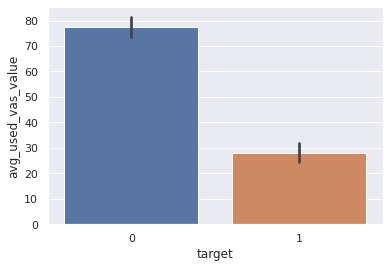

In [ ]:
sns.barplot(x='target',y='avg_used_vas_value',data= df)

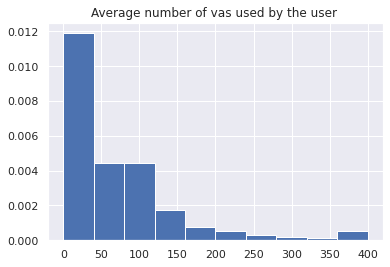

In [ ]:
#avg_used_vas_value: Average number of vas used by the user
#group_by_cust=df.groupby(['user_id'])
avg_amount=df3['avg_used_vas_value']

plt.hist(np.clip(avg_amount,0,400),density=True)
plt.title("Average number of vas used by the user ")
plt.show()

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


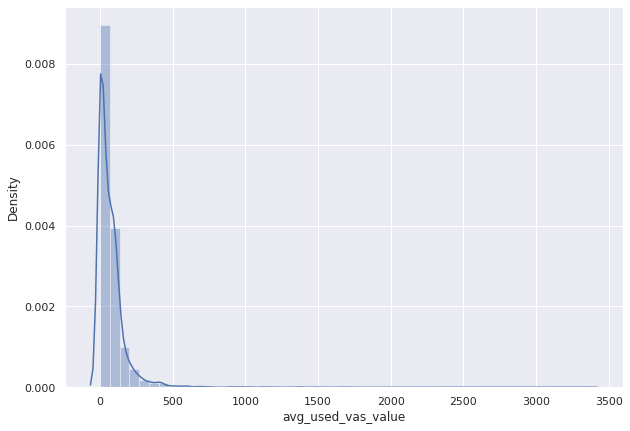

In [ ]:
plt.figure(figsize=(10,7))
sns.distplot(df.avg_used_vas_value)

avg_used_vas_value: Average number of vas used by the user
- min =0
- q1= 2.727273
- q2= 45
- q3= 100
- max= 3357.50

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


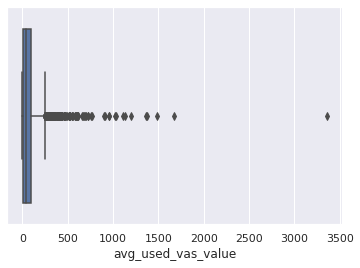

In [ ]:
sns.boxplot(df.avg_used_vas_value)

In [ ]:
IQR_1 = df.avg_used_vas_value.quantile(0.75) - df.avg_used_vas_value.quantile(0.25)

Lower_fence_1 = df.avg_used_vas_value.quantile(0.25) - (IQR_1 * 3)
Upper_fence_1 = df.avg_used_vas_value.quantile(0.75) + (IQR_1 * 3)

Upper_fence_1, Lower_fence_1, IQR_1

(391.10714285725, -288.14285714299996, 97.03571428575)

In [ ]:
print(np.where(df.avg_used_vas_value>391))

(array([  17,   54,  140,  144,  233,  272,  297,  307,  324,  325,  352,
        363,  391,  402,  403,  417,  435,  445,  457,  461,  470,  492,
        519,  585,  647,  661,  672,  734,  743,  745,  789,  885,  896,
        931,  956,  960,  996, 1026, 1034, 1043, 1075, 1095, 1182, 1251,
       1313, 1425, 1431, 1508, 1543, 1625, 1697, 1832, 1868, 1900, 1928,
       1949, 1955, 1994, 1998, 2084, 2156, 2389, 2425, 2503, 2521, 2564,
       2611, 2795, 2866, 2878, 2916, 2926, 3016, 3192, 3492, 3612, 3819,
       4084, 4370]),)


In [ ]:
print(np.where(df.avg_used_vas_value>1500))

(array([272, 457]),)


In [ ]:
df_filter = df.copy()
df_filter

,user_id,account_id,max_return_days,average_return_days,customer_since_months,average_revenue,avg_used_vas_value,business_type,avg_wallet_bonus,avg_active_ads,avg_new_ads,avg_email_replies,avg_sms_replies,target
0,410039,496.0,8,1.500000,14,0.00,66.666667,0,300.0,79.333333,15.250000,32.416667,0.250000,0
1,410240,499.0,37,8.200000,10,0.00,114.000000,0,0.0,232.100000,18.300000,16.200000,0.000000,0
2,411764,493.0,9,1.533333,15,0.00,106.666667,0,150.0,55.083333,3.750000,20.250000,0.000000,0
3,411985,262.0,1,1.000000,14,0.00,176.153846,0,1481.0,409.538462,80.769231,87.461538,0.000000,1
4,412071,496.0,1,1.000000,18,0.00,109.230769,0,41.5,48.230769,1.692308,17.461538,0.230769,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4402,73498690100,113.0,1,1.000000,4,0.00,0.000000,3,0.0,4.666667,2.000000,9.666667,0.333333,0
4403,73519239100,1017.0,1,1.000000,2,0.00,0.000000,4,0.0,153.000000,76.500000,9.000000,0.000000,0
4404,73525763100,226.0,1,1.000000,2,0.00,0.000000,1,0.0,0.000000,0.000000,0.000000,0.000000,0
4405,73538605100,226.0,1,1.000000,2,551.19,70.000000,1,0.0,17.000000,17.000000,10.000000,0.000000,0


In [ ]:
df_filter.loc[df_filter['avg_used_vas_value']>=1500,'avg_used_vas_value']=1500

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


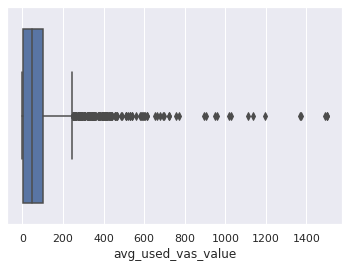

In [ ]:
sns.boxplot(df_filter.avg_used_vas_value)

### avg_active_ads: Average no of active ads

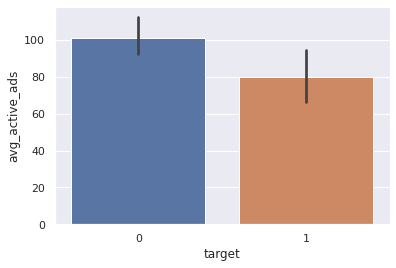

In [ ]:
sns.barplot(x='target',y='avg_active_ads',data= df)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


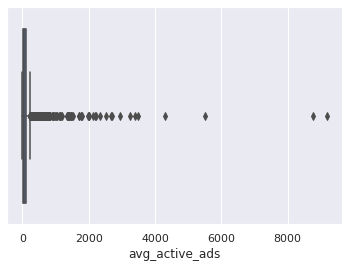

In [ ]:
sns.boxplot(df.avg_active_ads)

In [ ]:
IQR_1 = df.avg_active_ads.quantile(0.75) - df.avg_active_ads.quantile(0.25)

Lower_fence_1 = df.avg_active_ads.quantile(0.25) - (IQR_1 * 3)
Upper_fence_1 = df.avg_active_ads.quantile(0.75) + (IQR_1 * 3)

Upper_fence_1, Lower_fence_1, IQR_1

(364.71794858, -249.84615373999998, 87.79487175999999)

In [ ]:
print(np.where(df.avg_active_ads>365))
print(np.where(df.avg_active_ads>2000))
print(np.where(df.avg_active_ads>4000))

(array([   3,    5,   10,   11,   14,   17,   26,   30,   35,   40,   48,
         54,   63,   74,   94,  108,  140,  212,  216,  218,  234,  236,
        242,  243,  247,  275,  297,  305,  307,  324,  348,  357,  363,
        391,  401,  402,  403,  417,  445,  457,  461,  492,  514,  516,
        519,  528,  533,  545,  585,  588,  594,  647,  649,  650,  661,
        672,  681,  685,  704,  722,  734,  740,  745,  746,  755,  756,
        763,  775,  789,  799,  843,  863,  874,  896,  931,  956,  960,
        985,  994,  996, 1017, 1026, 1049, 1055, 1064, 1068, 1075, 1095,
       1100, 1132, 1156, 1195, 1197, 1211, 1239, 1255, 1295, 1339, 1344,
       1346, 1348, 1355, 1357, 1431, 1438, 1449, 1493, 1513, 1519, 1521,
       1535, 1551, 1625, 1659, 1680, 1692, 1789, 1832, 1838, 1855, 1868,
       1877, 1899, 1910, 1928, 1949, 1966, 1975, 1994, 2012, 2072, 2078,
       2084, 2085, 2139, 2183, 2197, 2318, 2328, 2347, 2453, 2579, 2604,
       2611, 2655, 2706, 2776, 2795, 2824, 2866, 2

In [ ]:
df_filter.loc[df_filter['avg_active_ads']>=6000,'avg_active_ads']=6000

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


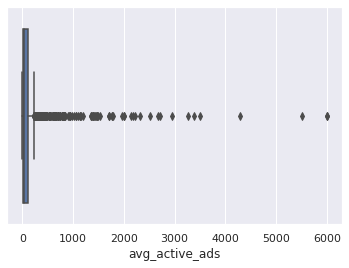

In [ ]:
sns.boxplot(df_filter.avg_active_ads)

In [ ]:
df_filter.dropna(subset = ['account_id'],axis=0,inplace=True)
df_filter.isnull().sum()

user_id                  0
account_id               0
max_return_days          0
average_return_days      0
customer_since_months    0
average_revenue          0
avg_used_vas_value       0
business_type            0
avg_wallet_bonus         0
avg_active_ads           0
avg_new_ads              0
avg_email_replies        0
avg_sms_replies          0
target                   0
dtype: int64

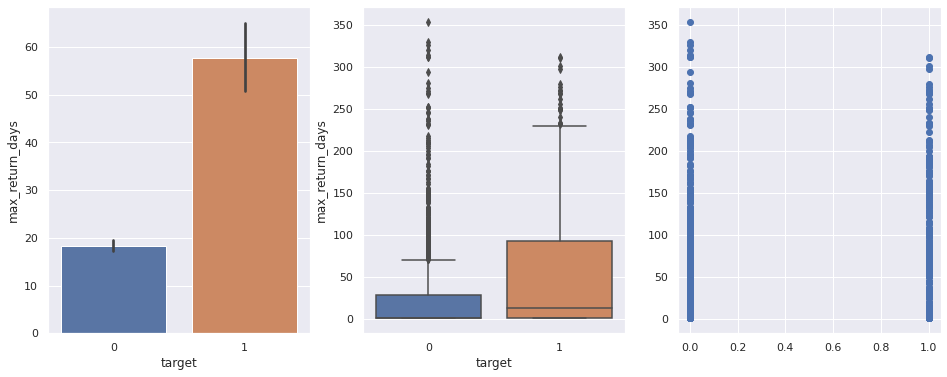

In [ ]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharex="col",sharey="row",figsize=(16,6))
plt.subplot(1,3,1)
sns.barplot(x='target',y='max_return_days',data= df)
plt.subplot(1,3,2)
sns.boxplot(x='target',y='max_return_days',data=df)
plt.subplot(1,3,3)
plt.scatter(y=df.max_return_days,x=df.target)
plt.show()

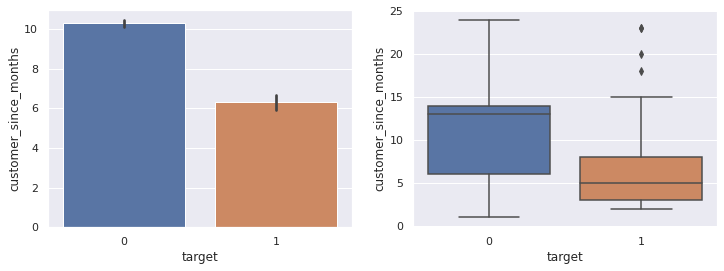

In [ ]:
f,(ax1,ax2)=plt.subplots(1,2,sharex="col",sharey="row",figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x='target',y='customer_since_months',data= df)
plt.subplot(1,2,2)
sns.boxplot(x='target',y='customer_since_months',data=df)
plt.show()


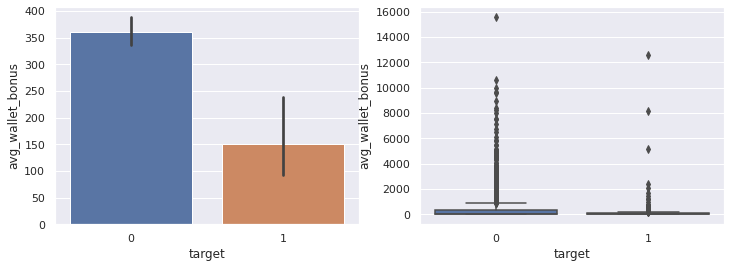

In [ ]:
f,(ax1,ax2)=plt.subplots(1,2,sharex="col",sharey="row",figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x='target',y='avg_wallet_bonus',data= df)
plt.subplot(1,2,2)
sns.boxplot(x='target',y='avg_wallet_bonus',data=df)
plt.show()


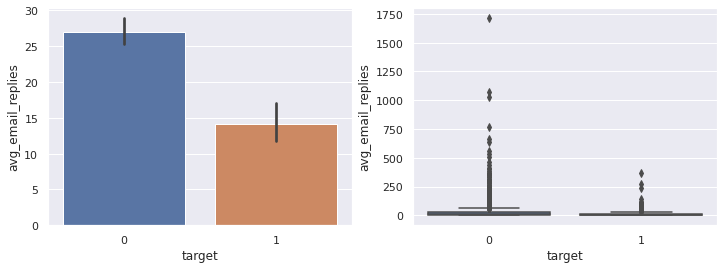

In [ ]:
f,(ax1,ax2)=plt.subplots(1,2,sharex="col",sharey="row",figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x='target',y='avg_email_replies',data= df)
plt.subplot(1,2,2)
sns.boxplot(x='target',y='avg_email_replies',data=df)
plt.show()



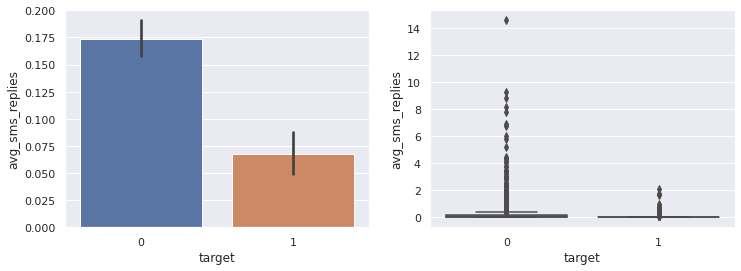

In [ ]:
f,(ax1,ax2)=plt.subplots(1,2,sharex="col",sharey="row",figsize=(12,4))
plt.subplot(1,2,1)
sns.barplot(x='target',y='avg_sms_replies',data= df)
plt.subplot(1,2,2)
sns.boxplot(x='target',y='avg_sms_replies',data=df)
plt.show()



In [ ]:
df_new.columns

Index(['user_id', 'account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'average_revenue', 'avg_used_vas_value',
       'business_type', 'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_sms_replies', 'target', 're-purchase',
       'customer_since_months_new'],
      dtype='object')

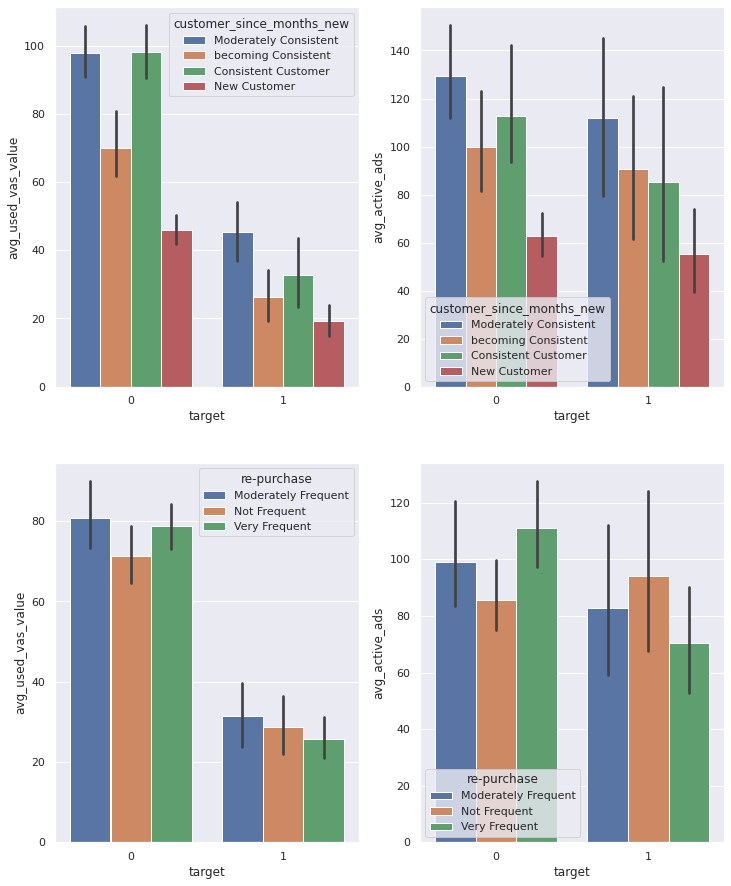

In [ ]:
f,(ax1,ax2,ax3)=plt.subplots(1,3,sharex="col",sharey="row",figsize=(12,4))
plt.subplot(2,2,1)
sns.barplot(x='target',y='avg_used_vas_value',hue='customer_since_months_new',data=df_new)
#plt.title("Year at present Job vs Job Category")
#plt.xlabel("Defaulter")
#plt.ylabel("Years at present Job")
plt.subplot(2,2,2)
sns.barplot(x='target',y='avg_active_ads',hue='customer_since_months_new',data=df_new)
#plt.title("Years of Job vs Reason")
#plt.xlabel("Defaulter")
#plt.ylabel("Years at present Job")
plt.subplot(2,2,3)
sns.barplot(x='target',y='avg_used_vas_value',hue='re-purchase',data=df_new)
#plt.title("Age of oldest trade line vs Job category")
#plt.xlabel("Defaulter")
#plt.ylabel("Age of oldest trade line(months)")
plt.subplot(2,2,4)
sns.barplot(x='target',y='avg_active_ads',hue='re-purchase',data=df_new)
#plt.title("Age of oldest trade line vs Reason")
#plt.xlabel("Defaulter")
#plt.ylabel("Age of oldest trade line(months)")
plt.subplots_adjust(bottom=-0.9, top=2)
plt.show()

creating dummy variable

In [ ]:
#to convert categorical into numerical
dum_df = pd.get_dummies(df_filter, columns=["business_type"] )
dum_df.columns



Index(['user_id', 'account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'average_revenue', 'avg_used_vas_value',
       'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_sms_replies', 'target', 'business_type_0',
       'business_type_1', 'business_type_2', 'business_type_3',
       'business_type_4', 'business_type_5'],
      dtype='object')

In [ ]:
df_new=dum_df.drop(['business_type_2'],1)
df_new.columns

Index(['user_id', 'account_id', 'max_return_days', 'average_return_days',
       'customer_since_months', 'average_revenue', 'avg_used_vas_value',
       'avg_wallet_bonus', 'avg_active_ads', 'avg_new_ads',
       'avg_email_replies', 'avg_sms_replies', 'target', 'business_type_0',
       'business_type_1', 'business_type_3', 'business_type_4',
       'business_type_5'],
      dtype='object')

In [ ]:
x=df_new.iloc[:,df_new.columns!='target']
y=df_new.iloc[:,0]

In [ ]:
#NORMALIZATION
from sklearn import preprocessing
x = preprocessing.StandardScaler().fit(x).transform(x.astype(float))
x[0:5]

array([[-0.60395024, -0.03237027, -0.32931132, -0.29528122,  0.79711736,
        -0.13220864, -0.04725911, -0.04722224, -0.06982248, -0.02234695,
         0.12113824,  0.16936822,  0.51487366, -0.34044324, -0.21764575,
        -0.1093596 , -0.19738551],
       [-0.60395021, -0.02316882,  0.33561667,  0.05335968,  0.02236225,
        -0.13220864,  0.39226805, -0.40770456,  0.51272692,  0.02252753,
        -0.17181959, -0.31325215,  0.51487366, -0.34044324, -0.21764575,
        -0.1093596 , -0.19738551],
       [-0.60394999, -0.04157172, -0.30638276, -0.29354669,  0.99080613,
        -0.13220864,  0.32417229, -0.2274634 , -0.16229568, -0.19154579,
        -0.0986554 , -0.31325215,  0.51487366, -0.34044324, -0.21764575,
        -0.1093596 , -0.19738551],
       [-0.60394996, -0.75008308, -0.48981117, -0.3212992 ,  0.79711736,
        -0.13220864,  0.9694153 ,  1.37187646,  1.18935797,  0.94163374,
         1.11553656, -0.31325215,  0.51487366, -0.34044324, -0.21764575,
        -0.1093596 

In [ ]:
#splitting the data into trainng and testing data
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [ ]:
print("shape of X_train,Y_train:",X_train.shape,Y_train.shape)
print("shape of X_test,Y_test:",X_test.shape,Y_test.shape)

shape of X_train,Y_train: (3520, 17) (3520,)
shape of X_test,Y_test: (880, 17) (880,)


In [ ]:
from sklearn import metrics
from sklearn.metrics import f1_score
from xgboost import XGBClassifier


In [ ]:
model2= XGBClassifier()
model2.fit(X_train,Y_train)

# Predicting the Test set results
Y_pred2 = model2.predict(X_test)

acc3=metrics.accuracy_score(Y_test, Y_pred2)
f1_score3=f1_score(Y_test, Y_pred2,average='macro') 

from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred2))
print("Precision:",metrics.precision_score(Y_test, Y_pred2))
print("Recall:",metrics.recall_score(Y_test, Y_pred2))
print('F1_score',f1_score3)

In [ ]:
print("Accuracy on train set:",metrics.accuracy_score(Y_train,model2.predict(X_train)))
print("Accuracy on test set:",metrics.accuracy_score(Y_test,Y_pred2))